# Практика
Неявка на прием к врачу — серьезная проблема в сфере общественного здравоохранения. Пропущенные приемы обходятся системе здравоохранения в США почти в [200 долларов каждый](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4714455/). Поэтому неудивительно, что снижение количества неявок стало приоритетом в Соединенных Штатах и во всем мире. Были проведены [многочисленные исследования](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3962267/) с целью определения наиболее эффективных средств снижения показателей невыхода на работу. Первым шагом к решению проблемы является понимание того, почему пациент пропускает запланированное посещение.

[Данные](https://drive.google.com/open?id=1bvlBkt0AYFw6ZLSjB41xHLnCLkweXxXE), 

Описание данных можно найти на [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)

Мы хотим ответить по существу на два вопроса:


1.   Каков портрет человека, пропускающего запланированные визиты к врачу?
2.   Какие факторы влияют на неявку?

Держите это в голове. Свои ответы сопровождайте графиками, не забывайте подписывать оси, и заголовки, а также выбирайте не тот тип визуализации, который вы поняли как работает, а тот, который подходит именно для задачи.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KaggleV2-May-2016.csv to KaggleV2-May-2016.csv
Saving online retail.csv to online retail.csv
Saving telecom_churn.csv to telecom_churn.csv


In [ ]:
df = pd.read_csv('KaggleV2-May-2016.csv')
# Переименование столбцов Handcap и SMS_recieved
df = df.rename(columns={'Handcap': 'Count_sms',
                   'SMS_received': 'Handcap'})
# Добавление столбца с информацией о том было ли отправлено пациенту хотя бы одно сообщение
df['SMS_received'] = df['Count_sms'] > 0
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Count_sms,Handcap,No-show,SMS_received
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,False


#### Задание 0
Приведите колонку no-show к колонке show, чтобы убрать двойное отрицание

In [ ]:
df = df.rename(columns={'No-show': 'Show'})
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Count_sms,Handcap,Show,SMS_received
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,False
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,False
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,False
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,False
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,False
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,False


In [ ]:
# Функция отрицания для столбца Show
def negative(cur):
  if cur == 'Yes':
    return 'No'
  else:
    return 'Yes'
df['Show'] = df['Show'].apply(negative)
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Count_sms,Handcap,Show,SMS_received
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,False
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,False
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,False
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,False
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,False
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,Yes,False
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,No,False
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,No,False
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,Yes,False
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,Yes,False


#### Задание 1
Проверьте данные на пропуски и выбросы

In [ ]:
for i in df.columns:
  print(f'{i}: {df[i].unique()}\n')
# В общем и целом пропусков нет, но нужно проверить столбцы с id и датами 

PatientId: [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]

AppointmentID: [5642903 5642503 5642549 ... 5630692 5630323 5629448]

Gender: ['F' 'M']

ScheduledDay: ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']

AppointmentDay: ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:0

In [ ]:
# По моей идее, если в столбцах только числа или значения даты, то при вычитании из столбца этих же значений, во всех строках (в этом столбце) будет 0.
df2 = pd.DataFrame()
df2['PatId'] = df['PatientId'] - df['PatientId']
df2['ApporId'] = df['AppointmentID'] - df['AppointmentID']
df2['SchdDay'] = df['ScheduledDay'] - df['ScheduledDay']
df2['AppDay'] = df['AppointmentDay'] - df['AppointmentDay']
for i in df2.columns:
  print(f'{i}: {df2[i].unique()}\n')
# Во всех колонках пропусков нет

PatId: [0.]

ApporId: [0]

SchdDay: [0]

AppDay: [0]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Count_sms,Handcap,Show,SMS_received
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,False,False,False,False,0,False,Yes,False
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,False,False,False,False,1,False,No,True
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,False,False,False,False,1,False,No,True
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,False,False,False,False,1,False,No,True
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,False,False,False,False,1,False,Yes,True
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49,2016-06-02,102,MARIA ORTIZ,False,False,False,False,0,False,Yes,False
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,False,True,False,False,0,True,Yes,False


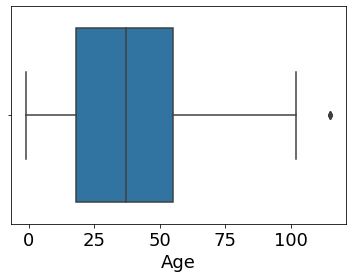

In [ ]:
# Проверка на выбросы
sns.boxplot(df['Age'])
df[df['Age'] > 100]
# Выбросы есть
# 115 - аномальное значение

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 100,  99,  -1])

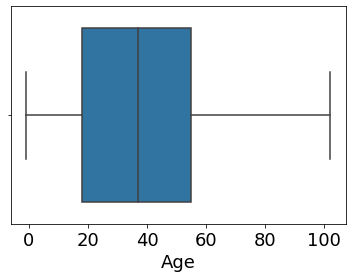

In [ ]:
# Удаляю строки, в которых возраст пациента равен 115
df = df.drop(df[df['Age'] == 115].index)
sns.boxplot(df['Age'])
df['Age'].unique()

#### Задание 2
Приведите колонки к правильным типам данных (по крайней мере временные)

In [ ]:
df = df.astype({'ScheduledDay': 'datetime64',
           'AppointmentDay': 'datetime64',
           'Gender': 'category',
           'Age': 'int8',
           'Scholarship': 'bool',
           'Hipertension': 'bool',
           'Diabetes': 'bool',
           'Alcoholism': 'bool',
           'Count_sms': 'category',
           'Handcap': 'bool',})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110522 non-null  float64       
 1   AppointmentID   110522 non-null  int64         
 2   Gender          110522 non-null  category      
 3   ScheduledDay    110522 non-null  datetime64[ns]
 4   AppointmentDay  110522 non-null  datetime64[ns]
 5   Age             110522 non-null  int8          
 6   Neighbourhood   110522 non-null  object        
 7   Scholarship     110522 non-null  bool          
 8   Hipertension    110522 non-null  bool          
 9   Diabetes        110522 non-null  bool          
 10  Alcoholism      110522 non-null  bool          
 11  Count_sms       110522 non-null  category      
 12  Handcap         110522 non-null  bool          
 13  Show            110522 non-null  object        
 14  SMS_received    110522 non-null  boo

#### Задание 3
Проверьте диапазоны значений возраста (Age)

Есть ли записи, которые кажутся вам подозрительными?
Стоит ли эти записи оставить или стоит убрать? Почему вы так думаете (в решении этого вопроса может помочь описание данных на сайте kaggle)?

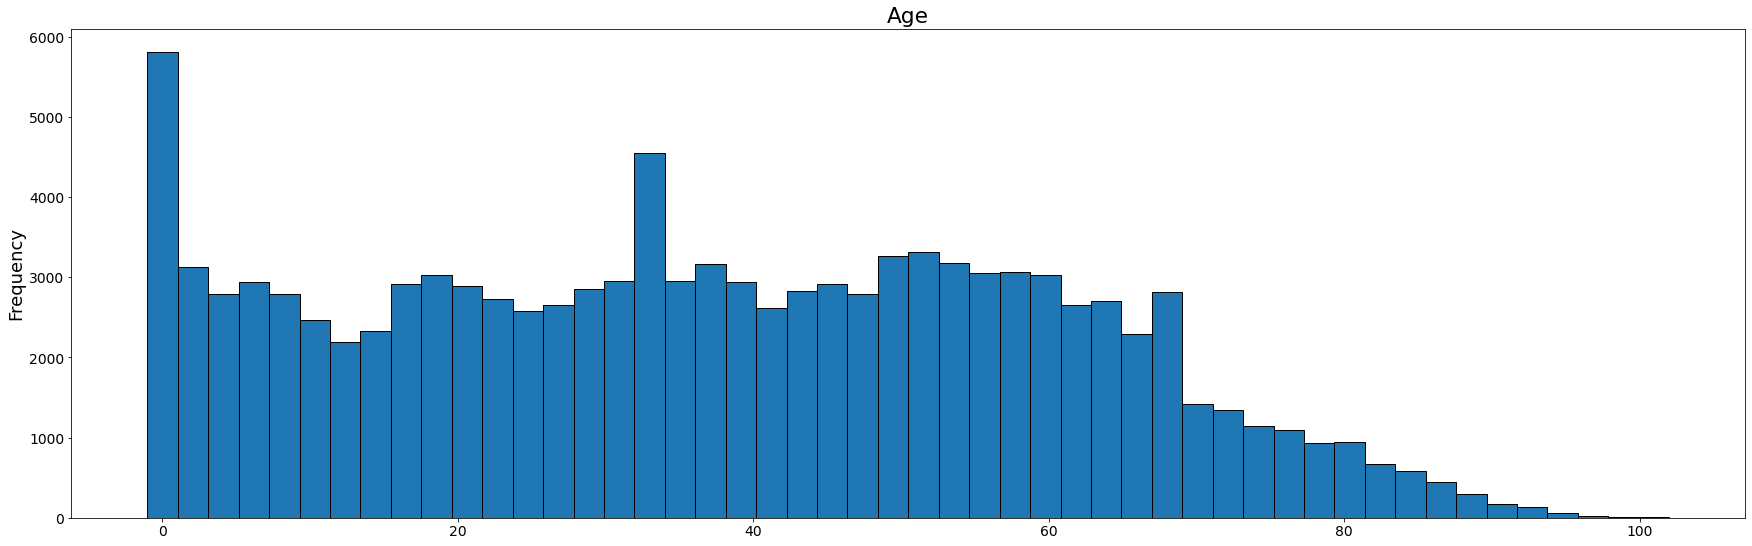

In [ ]:
plt.figure()
plt.rcParams.update({'font.size': 18})
df['Age'].plot.hist(bins=50, figsize=(30,9), fontsize=14, title='Age', edgecolor='black')
# Как возраст может быть равен -1???

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 100,  99], dtype=int8)

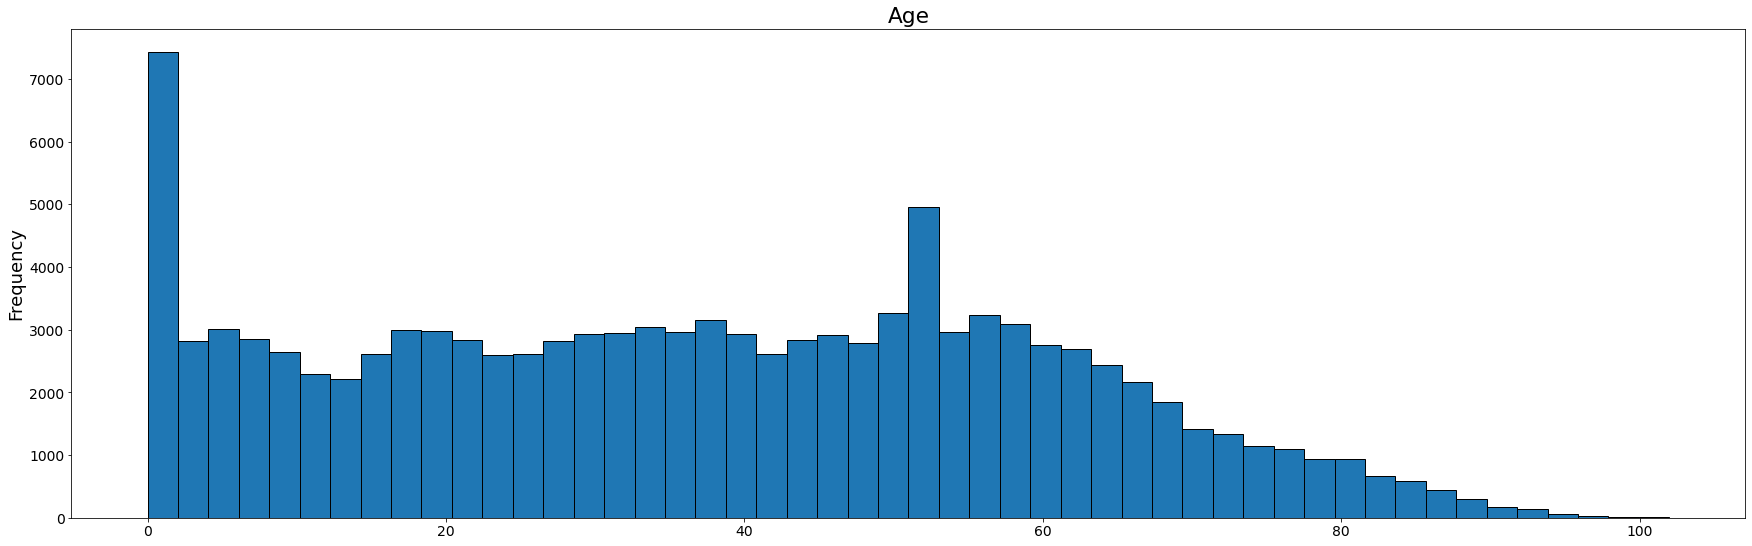

In [ ]:
# Удаляю строки, в которых возраст пациента равен -1
plt.rcParams.update({'font.size': 18})
df = df.drop(df[df['Age'] == -1].index)
df['Age'].plot.hist(bins=50, figsize=(30,9), fontsize=14, title='Age', edgecolor='black')
df['Age'].unique()

#### Задание 4
Уникальные ли пациенты в нашей таблице? Мы имеем дело со списком разовых приемов или по крайней мере часть из них регулярные?

One: 60.9%
More than one: 39.1%


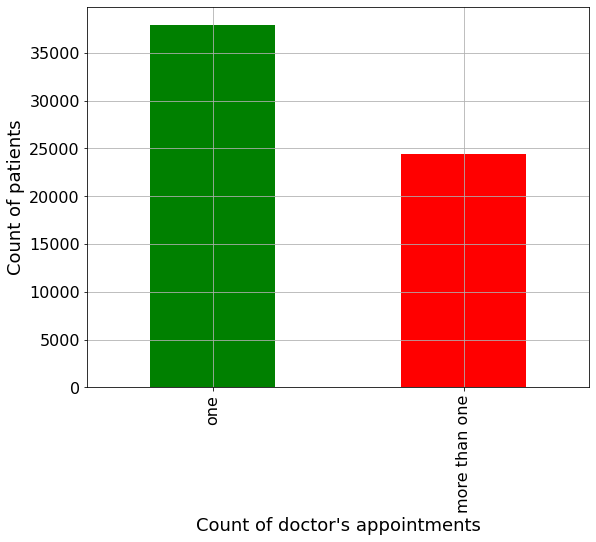

In [ ]:
plt.figure()
plt.rcParams.update({'font.size': 18})
pations = df['PatientId'].value_counts()
pations['one'] = pations[pations.values == 1].count()  
pations['more than one'] = pations[pations.values > 1].count()  
pations[['one', 'more than one']].plot.bar(xlabel="Count of doctor's appointments", ylabel='Count of patients', fontsize=16, figsize=(9,7), color=['g', 'r'], grid=True)
print(f'One: {round(pations["one"]/pations.count(),3)*100}%')
print(f'More than one: {round(pations["more than one"]/pations.count(),3)*100}%')
# Большая часть (почти 2/3) это разовые посещения.

#### Задание 5
Если у нас имеются неоднократные посещения, влияет ли как-то номер (1-ый 2-ой 3-ий...) приёма на явку? Где прогулы происходят чаще, для регулярных посещений или для разовых? В решении этого задания вам может помочь функция [.rank()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.core.groupby.GroupBy.rank.html) 

[stackoverflow](https://stackoverflow.com/questions/33899369/ranking-order-per-group-in-pandas)

Можно ли уверенно говорить о шансе посещения для больших номеров?

In [ ]:
# Функция объединения групп в одну большую группу, так как слишком мало информации по ним
# В данном случае объединение в одну группу пациентов, которые более 8 раз приходили/не приходили на приём
def unification(cur):
  if int(cur) > 8:
    return '>8'
  else:
    return cur

<Figure size 432x288 with 0 Axes>

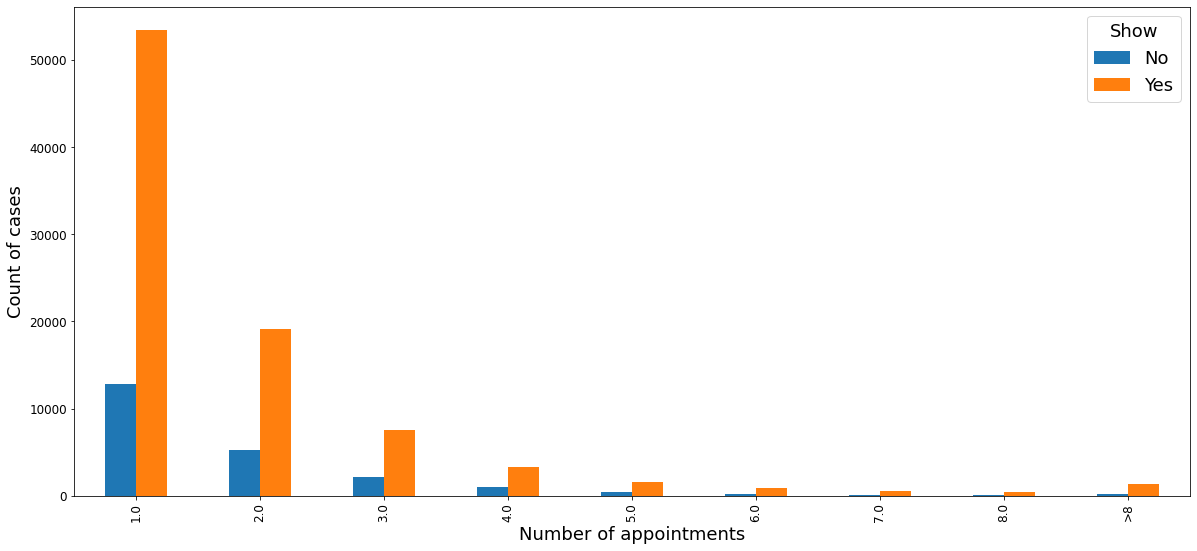

In [ ]:
plt.figure()
plt.rcParams.update({'font.size': 18})
df["Rank_apport"] = df.groupby("PatientId")["AppointmentDay"].rank("dense", ascending=True)
df = df.astype({'Rank_apport': 'object'})
df['Rank_apport'] = df['Rank_apport'].apply(unification)
pd.crosstab(df['Rank_apport'], df['Show']).plot.bar(figsize=(20,9), fontsize=12, xlabel="Number of appointments", ylabel='Count of cases')
# По мере увеличения номера приёма у врача всё меньше и меньше людей записываются на повторный приём

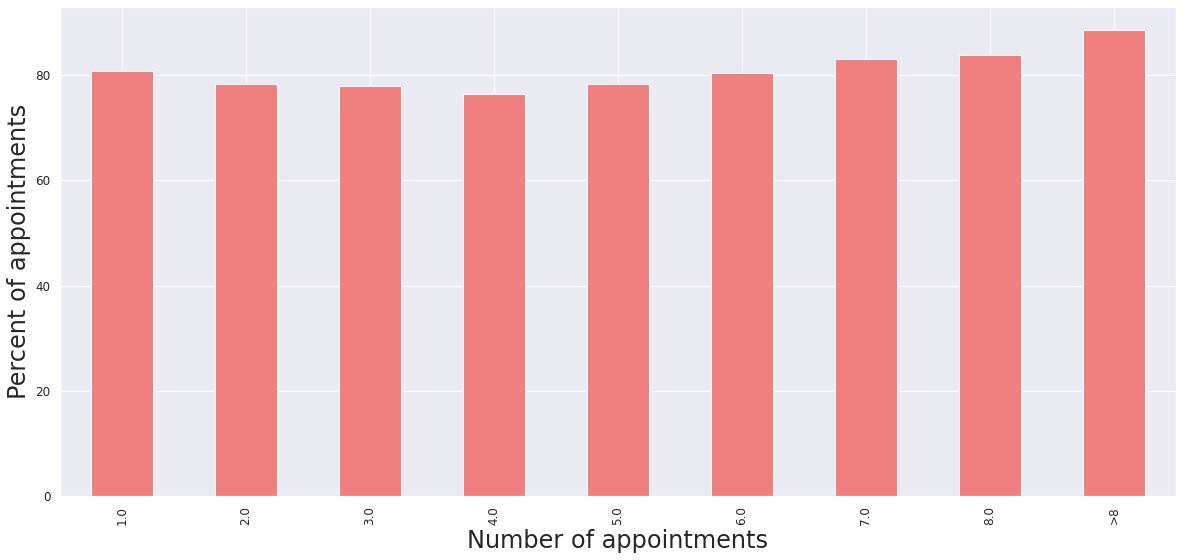

In [ ]:
rel_df = round(df[df['Show'] == 'Yes'].groupby('Rank_apport').size() / df.groupby('Rank_apport').size(),4)*100
rel_df.plot.bar(figsize=(20,9), fontsize=12, xlabel="Number of appointments", ylabel='Percent of appointments', color='lightcoral')
# После 4-го приёма процент посещений увеличивается
# И для пациентов, которые 8 и более раз записывались на приём, процент посещений максимальный

#### Задание 6
Исследуйте влияние возраста на явку. Удобно использовать функцию [pd.cut](https://stackoverflow.com/questions/45751390/pandas-how-to-use-pd-cut) для создания интервалов. 

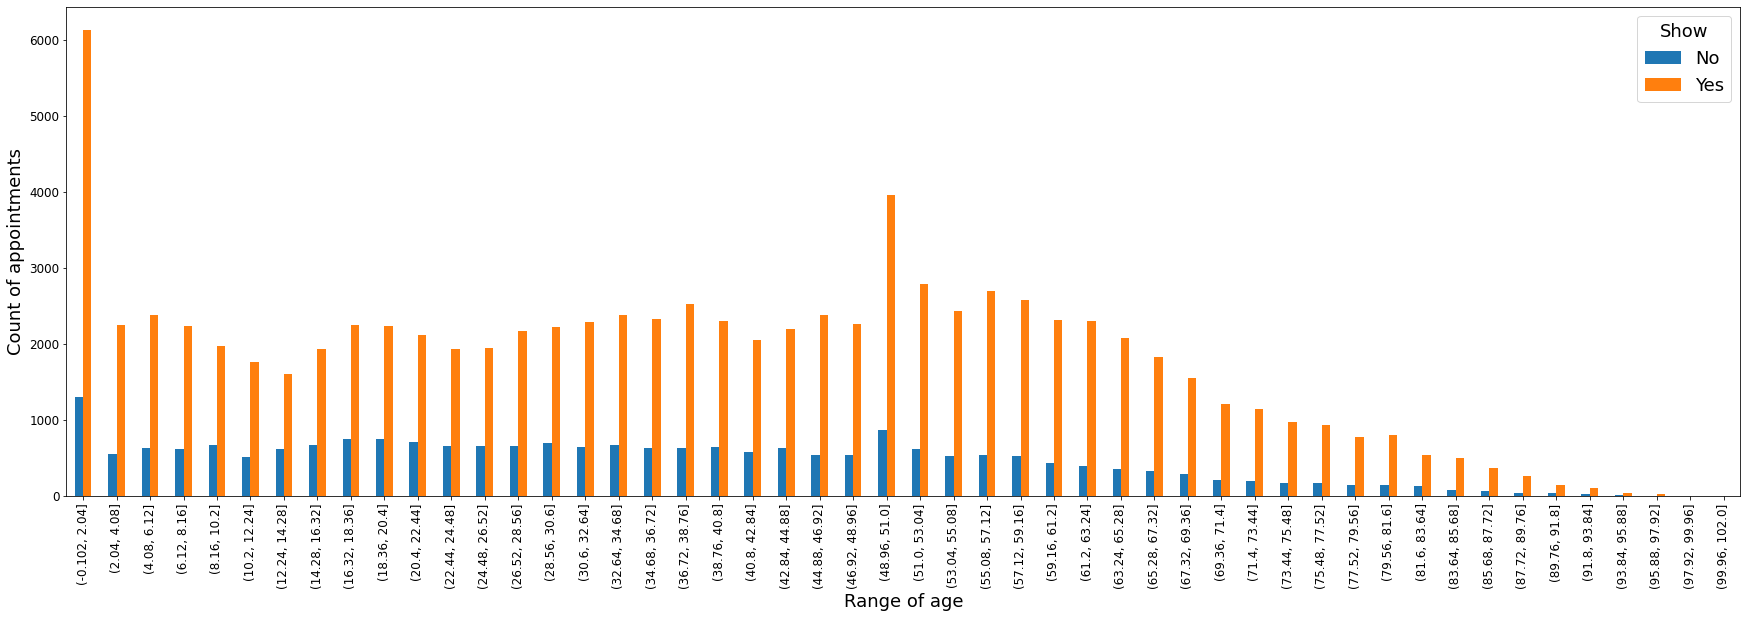

In [ ]:
df['range_of_age'] = pd.cut(df['Age'], bins=50)
pd.crosstab(df['range_of_age'], df['Show']).plot.bar(figsize=(30,9),  fontsize=12, xlabel="Range of age", ylabel='Count of appointments')
# Максимальная посещаемость получилась там же где есть максимальное кол-во прогулов
# Это возраст 0-2 года и 49-51 год
# В целом можно сказать что если апроксимировать данные по посещаемости и прогулам, то получаться очень похожие функции

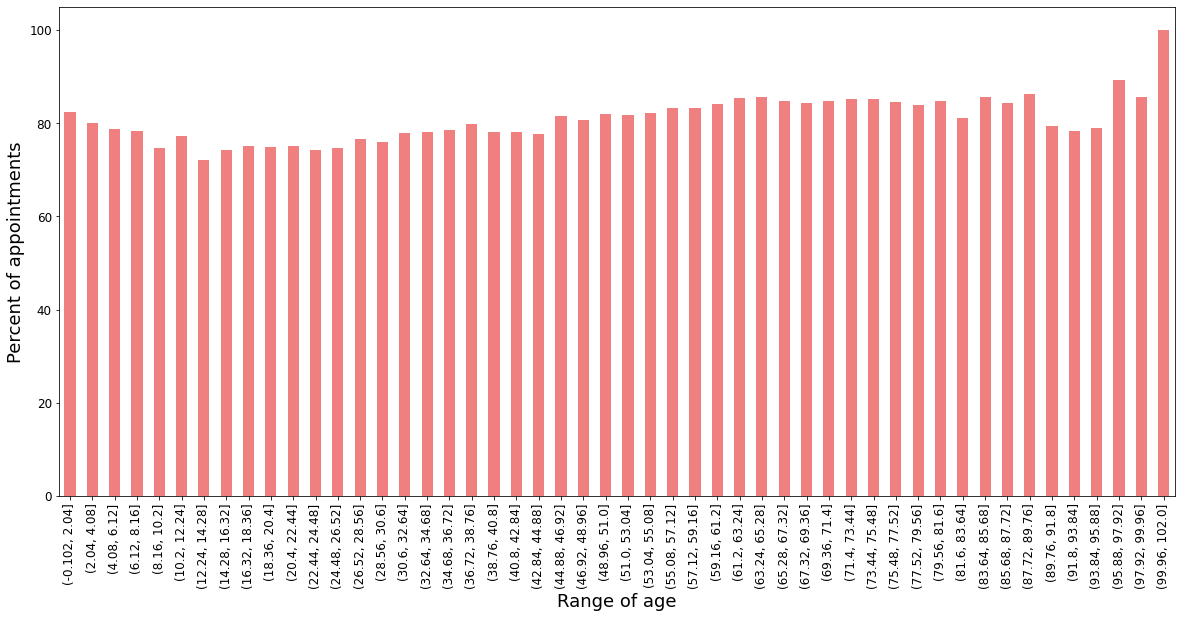

In [ ]:
rel_df = round(df[df['Show'] == 'Yes'].groupby('range_of_age').size() / df.groupby('range_of_age').size(), 4)*100
rel_df.plot.bar(figsize=(20,9), fontsize=12, xlabel="Range of age", ylabel='Percent of appointments', color='lightcoral')
# Как ни странно, но у людей, возраст которых 100-102 года, посещаемость 100% 
# У людей в возрасте (старше 45 лет) в целом посещаемость выше, чем у молодых людей

#### Задание 7
К разбивке по возрастам, добавьте разбивку по полу. Может быть один пол прогуливает приемы чаще другого? Во всех ли возрастных группах мы можем уверенно сравнивать шанс пропуска (иными словами, нет ли в какой-нибудь из групп перекоса в сторону мужчин или женщин по кол-ву записей о приемах)?

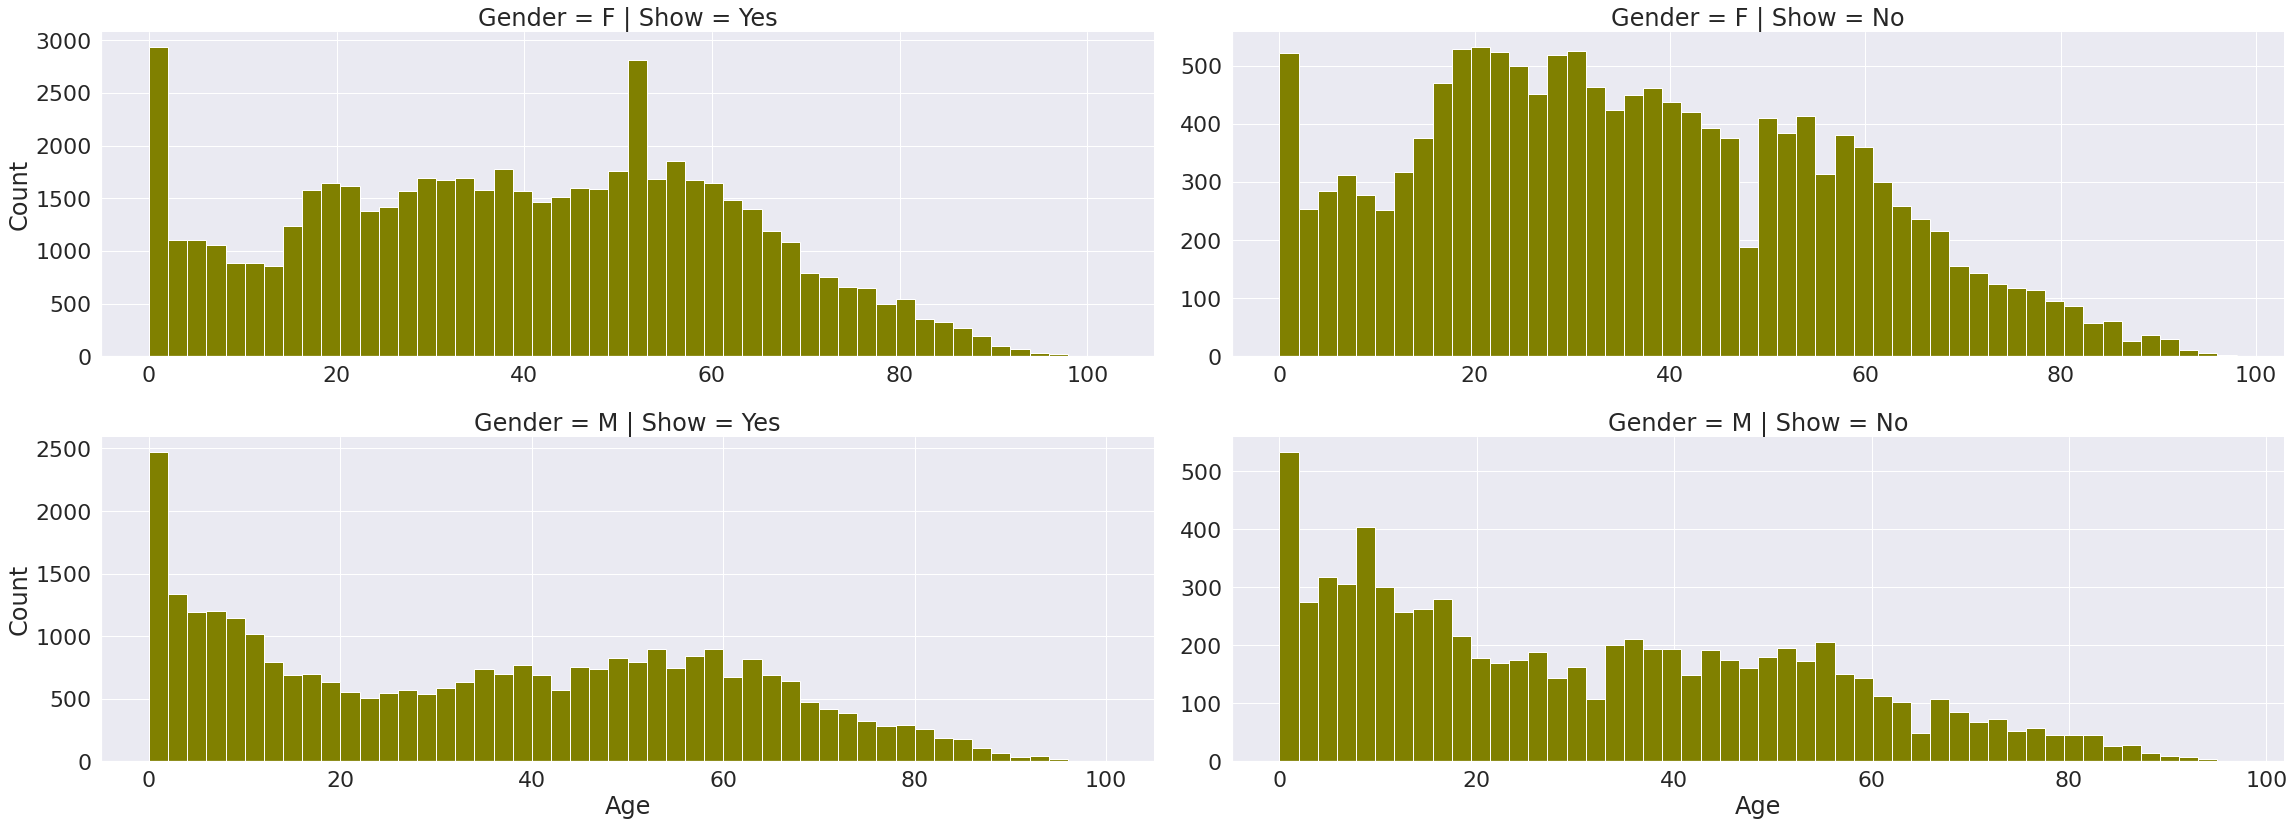

In [ ]:
sns.set(font_scale=2)
g = sns.FacetGrid(df, col='Show', row='Gender', sharex=False, sharey=False, height=6, aspect=16/6)
g = g.map(plt.hist, 'Age', bins=50, color='olive')
g.set_ylabels('Count')
# Явно женщицы чаще записываются ко врачу
# Женщины в возрасте 49-52 лет значительно реже прогуливают приём ко врачу, это видно по обоим графикам
# Одинаково высокие посещаемость и прогулы для младенцев (то есть их родителей)

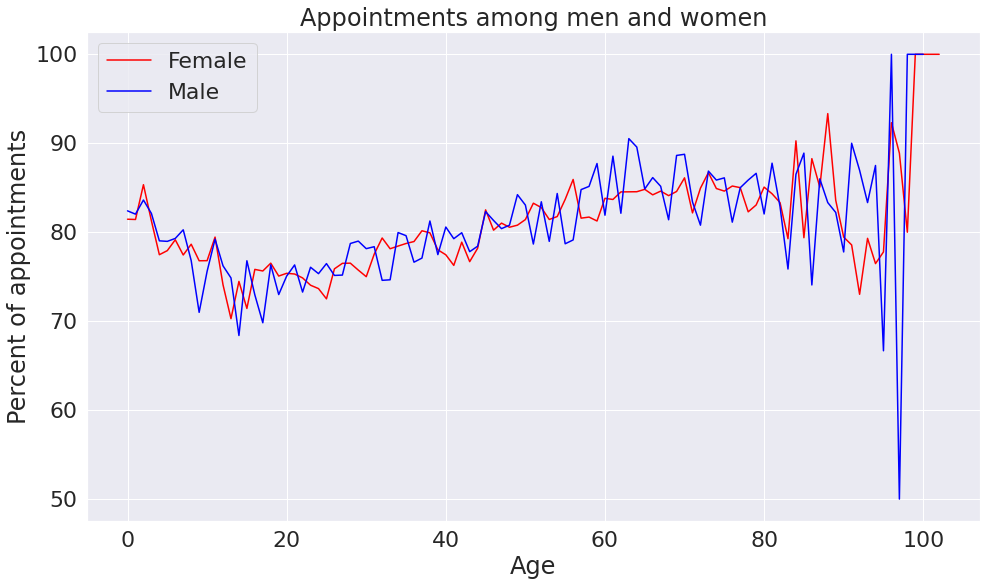

In [ ]:
rel_df_female = round(df[(df['Show'] == 'Yes') & (df['Gender'] == 'F')].groupby('Age').size() / df[df['Gender'] == 'F'].groupby('Age').size(), 4)*100
rel_df_male = round(df[(df['Show'] == 'Yes') & (df['Gender'] == 'M')].groupby('Age').size() / df[df['Gender'] == 'M'].groupby('Age').size(), 4)*100
fig, ax = plt.subplots(figsize=(16,9)) 
ax.plot(rel_df_female, color = 'red')
ax.plot(rel_df_male, color = 'blue')
ax.set_xlabel('Age') 
ax.set_ylabel('Percent of appointments')
ax.set_title('Appointments among men and women')
ax.legend(["Female", "Male"])
# При оценке посещаемости по возрастам у мужчин в целом посещаемость выше
# Но у них также наблюдается возрастная группа, которая имеет самый низкий процент посещаемости
# Если ограничить значения по оси x, то можно это подробнее рассмотреть

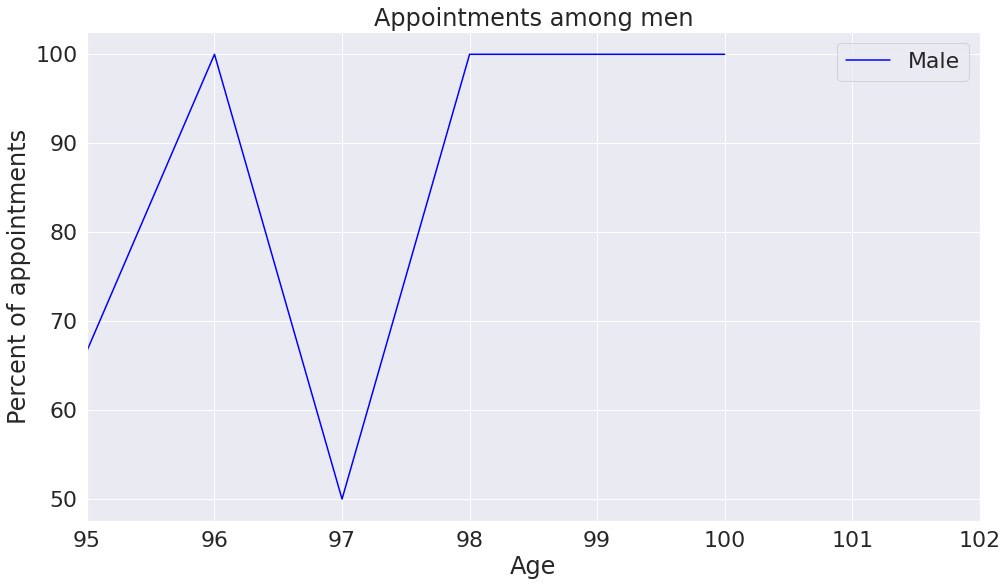

In [ ]:
fig, ax = plt.subplots(figsize=(16,9)) 
ax.plot(rel_df_male, color = 'blue')
ax.set_xlim(left=95, right=102)
ax.set_xlabel('Age') 
ax.set_ylabel('Percent of appointments')
ax.set_title('Appointments among men')
ax.legend(["Male"])
# Самый низкий процент посешаемости среди мужчин 97 лет

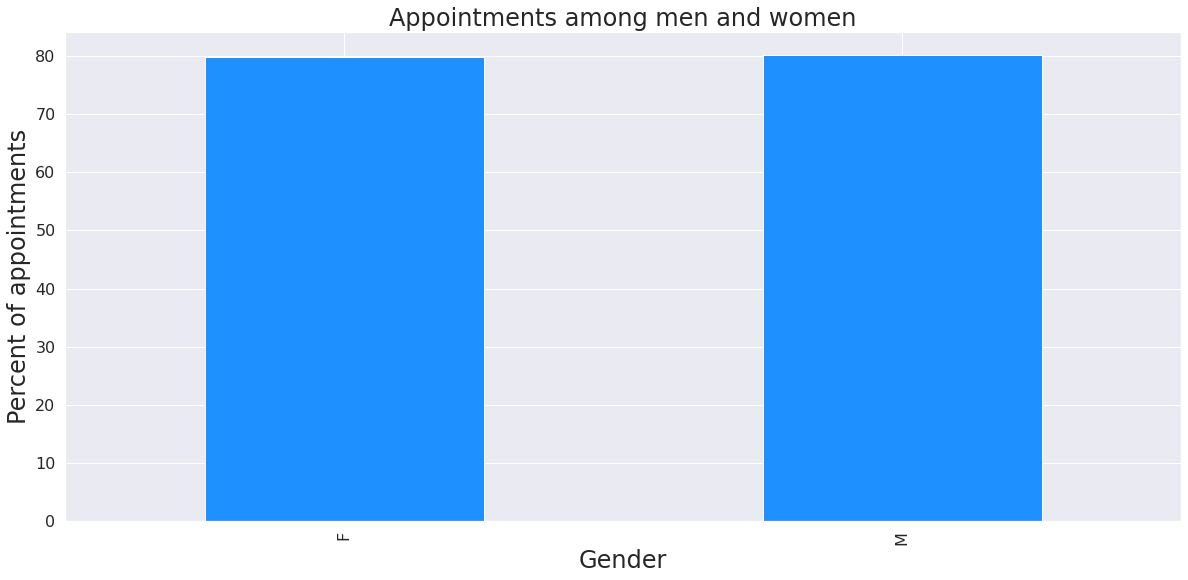

In [ ]:
rel_df = round(df[df['Show'] == 'Yes'].groupby('Gender').size() / df.groupby('Gender').size(), 4)*100
rel_df.plot.bar(figsize=(20,9), fontsize=16, xlabel="Gender", ylabel='Percent of appointments', color='dodgerblue', title='Appointments among men and women')
# Да, так и есть
# У мужчин посещаемость немного выше

#### Задание 8
Исследуйте влияние времени ожидания приёма на явку. Можно воспользоваться тем же подходом, что и в задании 5.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Count_sms,Handcap,Show,SMS_received,Waiting_time
59691,8.777346e+13,5733664,M,2016-05-24 14:14:21,2016-05-24,38,SANTA LÚCIA,False,False,False,False,0,False,Yes,False,"(-7 days +07:57:51.243000, 2 days 15:31:55.700..."
71841,8.676848e+11,5715009,F,2016-05-18 13:30:28,2016-05-18,54,PRAIA DO CANTO,False,False,False,False,0,False,Yes,False,"(-7 days +07:57:51.243000, 2 days 15:31:55.700..."
55096,5.348176e+13,5699294,F,2016-05-16 08:22:30,2016-05-16,55,DA PENHA,False,False,False,False,0,False,Yes,False,"(-7 days +07:57:51.243000, 2 days 15:31:55.700..."


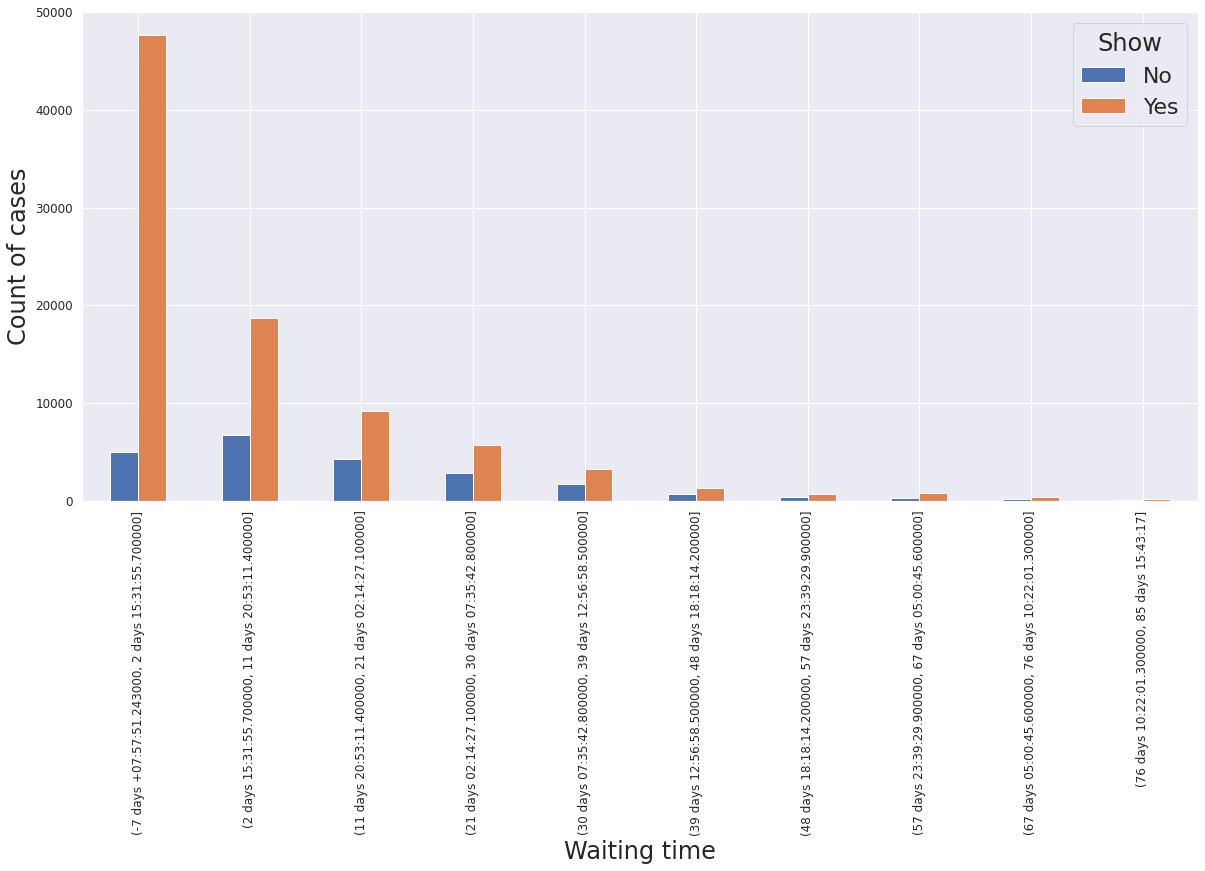

In [ ]:
import datetime

df['Waiting_time'] = df['AppointmentDay'] - df['ScheduledDay']
# Попробовал ограничить значения для оси X
# Оставил только те данные, в которых время ожидания составило меньше 86 дней 
df = df[df['Waiting_time'] < pd.Timedelta(datetime.timedelta(days = 86))]
df['Waiting_time'] = pd.cut(df['Waiting_time'], bins=10)
sns.set(rc={'figure.figsize':(16,9)}, font_scale=2)
pd.crosstab(df['Waiting_time'], df['Show']).plot.bar(figsize=(20,9), fontsize=12, xlabel="Waiting time", ylabel='Count of cases')
df.sample(3)

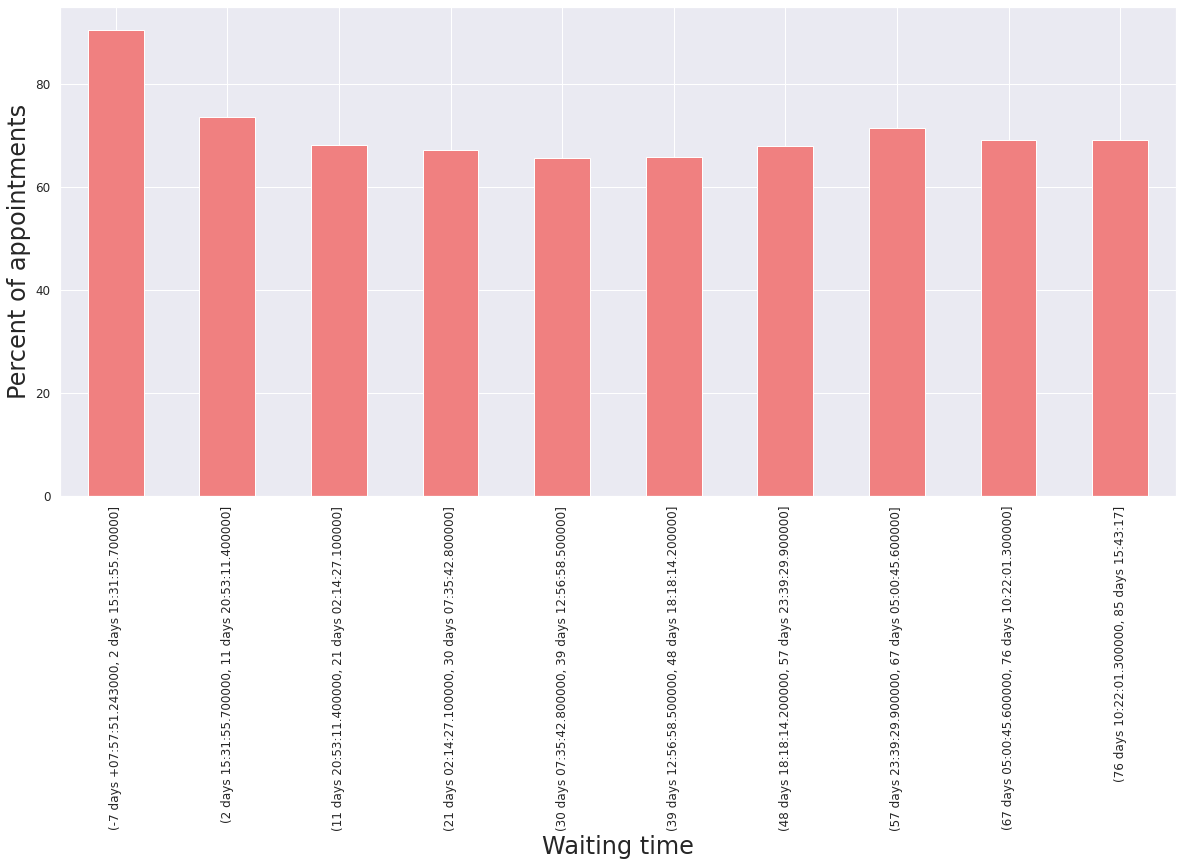

In [ ]:
rel_df = round(df[df['Show'] == 'Yes'].groupby('Waiting_time').size() / df.groupby('Waiting_time').size(),4)*100
rel_df.plot.bar(figsize=(20,9), fontsize=12, xlabel="Waiting time", ylabel='Percent of appointments', color='lightcoral')
# Если время ожидания больше двух дней, то процент посещений резко падает

#### Задание 9
В общем по выборке влияет ли СМС на явку?

Percent of appointments:
SMS_received=True: 0.819400983459991
SMS_received=False: 0.7976432344575376


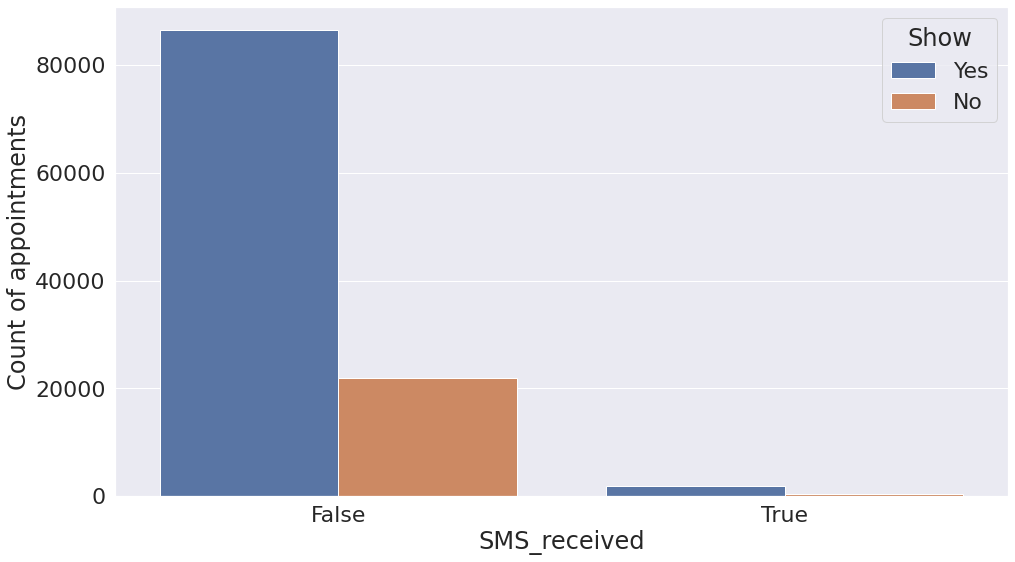

In [ ]:
sns.set(rc={'figure.figsize':(16,9)}, font_scale=2)
sns.countplot(x="SMS_received", hue="Show", data=df).set_ylabel('Count of appointments')
# Отношение кол-ва посещений врача к общему кол-ву записей на приём (в зависимости от получения/неполучения sms)
print('Percent of appointments:')
print(f"SMS_received=True: {df[(df['Show'] == 'Yes') & (df['SMS_received'] == True)]['AppointmentID'].count() / df[df['SMS_received'] == True]['AppointmentID'].count()}")
print(f"SMS_received=False: {df[(df['Show'] == 'Yes') & (df['SMS_received'] == False)]['AppointmentID'].count() / df[df['SMS_received'] == False]['AppointmentID'].count()}")
# Рассылка положительно, но незначительно влияет на процент посещений

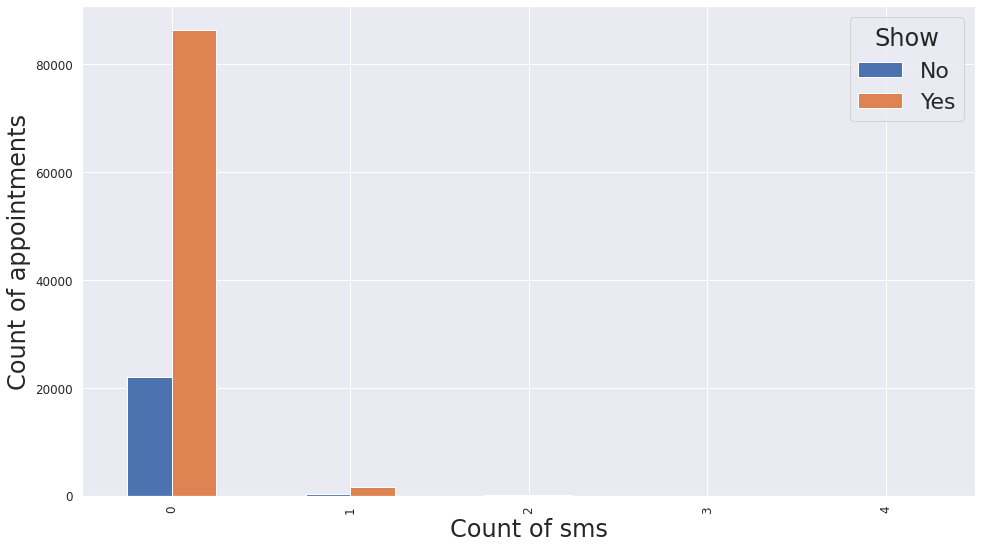

In [ ]:
pd.crosstab(df['Count_sms'], df['Show']).plot.bar(figsize=(16,9),  fontsize=12, xlabel="Count of sms", ylabel='Count of appointments')
# Кто-то даже 4 sms получал
# Но большая часть пациентов либо не получали sms, либо получали 1 sms

In [ ]:
# Функция объединения групп в одну большую группу, так как слишком мало информации по ним
# В данном случае объединение в одну группу приёмов ко врачу, перед которыми пациенты получали более 1 sms
def union_sms(cur):
  if int(cur) > 1:
    return '>1'
  else:
    return cur

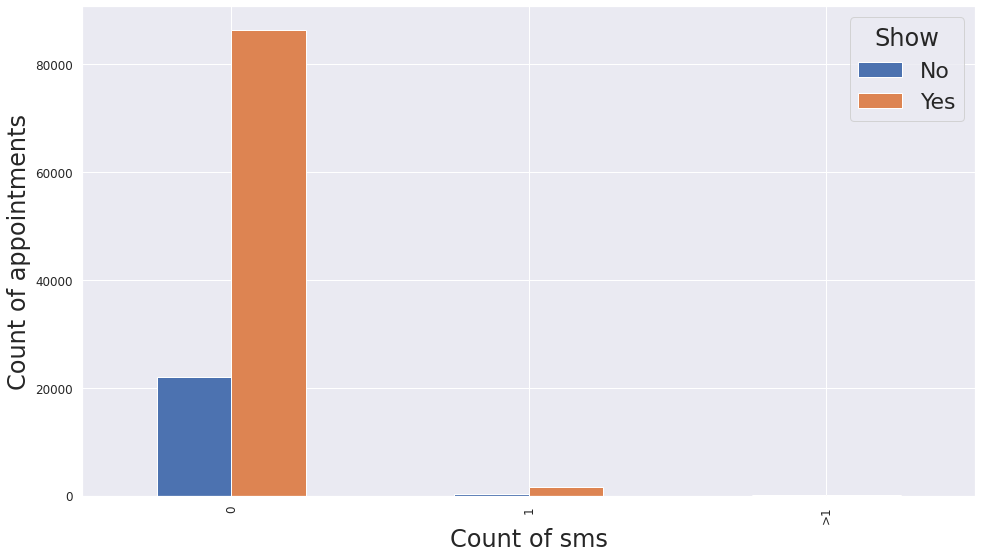

In [ ]:
df = df.astype({'Count_sms': 'category'})
df['Count_sms'] = df['Count_sms'].apply(union_sms)
pd.crosstab(df['Count_sms'], df['Show']).plot.bar(figsize=(16,9),  fontsize=12, xlabel="Count of sms", ylabel='Count of appointments')
# В данном случае даже объединение в одну группу не поможет)
# На общем фоне таких случаев, когда пациент получал более 1 sms было очень мало

#### Задание 10
Исследуйте влияние отправки СМС на явку среди прогульщиков. Прогульщиком назовем тех, кто хотя бы раз пропускал прием.

Верны ли эти выводы для тех пациентов у которых было более 1-ой записи (>=5 записей)?

Percent of appointments:
SMS_received=True: 0.5334872979214781
SMS_received=False: 0.48043818466353677


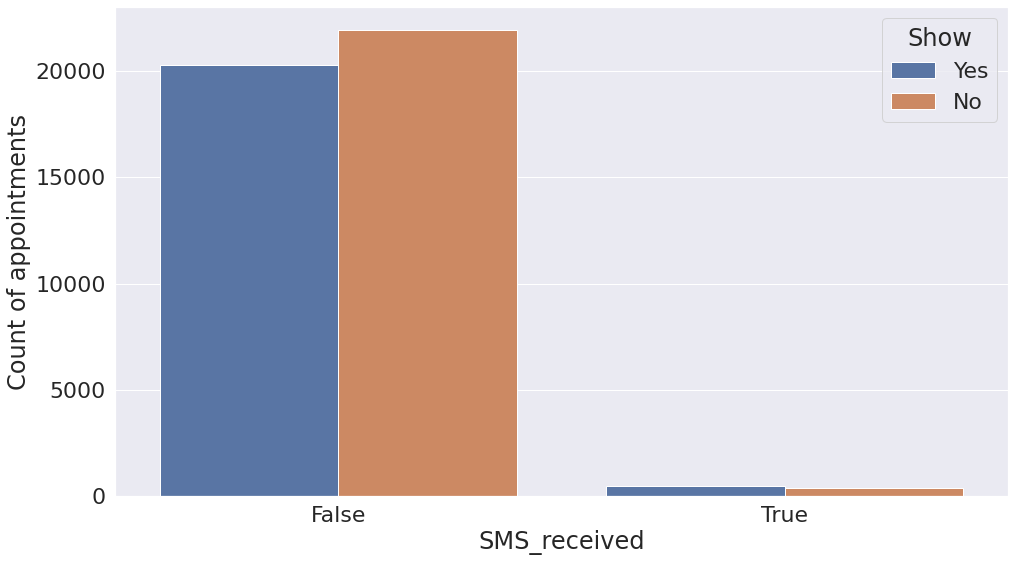

In [ ]:
# truants - прогульщики
truants = df['PatientId'][df['Show'] == 'No'].drop_duplicates()
df_truants = df[df['PatientId'].isin(truants)]
sns.set(rc={'figure.figsize':(16,9)}, font_scale=2)
sns.countplot(x="SMS_received", hue="Show", data=df_truants).set_ylabel('Count of appointments')
print('Percent of appointments:')
print(f"SMS_received=True: {df_truants[(df_truants['Show'] == 'Yes') & (df_truants['SMS_received'] == True)]['AppointmentID'].count() / df_truants[df_truants['SMS_received'] == True]['AppointmentID'].count()}")
print(f"SMS_received=False: {df_truants[(df_truants['Show'] == 'Yes') & (df_truants['SMS_received'] == False)]['AppointmentID'].count() / df_truants[df_truants['SMS_received'] == False]['AppointmentID'].count()}")
# И здесь отправка сообщений положительно влияет на посещаемость
# Но опять же не сильно

Percent of appointments:
SMS_received=True: 0.8571428571428571
SMS_received=False: 0.8480138169257341


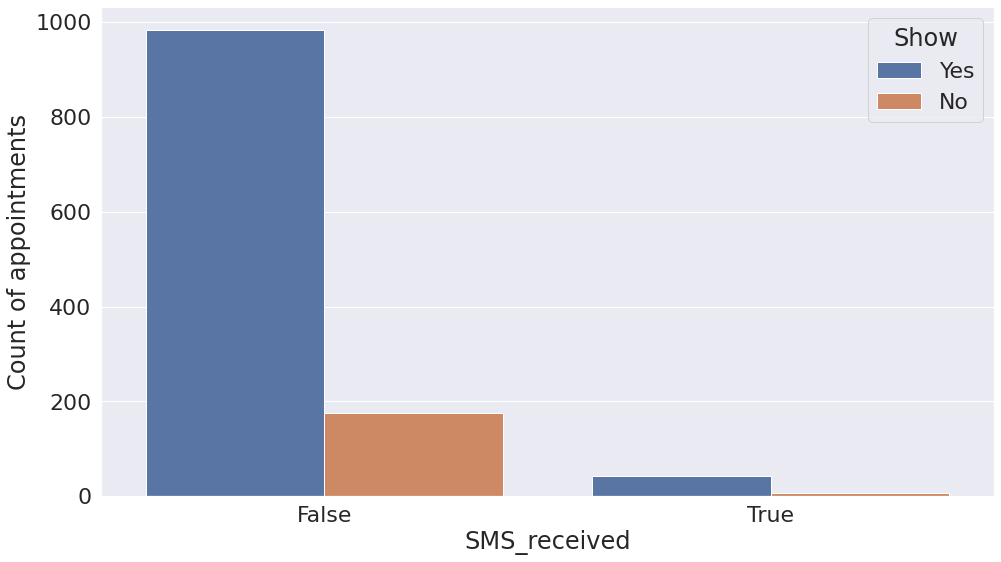

In [ ]:
# truants - прогульщики
truants = df['PatientId'][df['Show'] == 'No'].drop_duplicates()
df_truants = df[df['PatientId'].isin(truants)]
df_truants = df_truants[df_truants['Rank_apport'].isin(['6.0', '7.0', '8.0', '>8'])]
sns.set(rc={'figure.figsize':(16,9)}, font_scale=2)
sns.countplot(x="SMS_received", hue="Show", data=df_truants).set_ylabel('Count of appointments')
print('Percent of appointments:')
print(f"SMS_received=True: {df_truants[(df_truants['Show'] == 'Yes') & (df_truants['SMS_received'] == True)]['AppointmentID'].count() / df_truants[df_truants['SMS_received'] == True]['AppointmentID'].count()}")
print(f"SMS_received=False: {df_truants[(df_truants['Show'] == 'Yes') & (df_truants['SMS_received'] == False)]['AppointmentID'].count() / df_truants[df_truants['SMS_received'] == False]['AppointmentID'].count()}")
# Посещаемость намного выше
# Отправка сообщений почти не влияет на посещаемость

#### Задание 11
Проанализируйте еще какой-нибудь возможный фактор, влияющий на явку. Можно попробовать совместить несколько уже рассмотренных признаков, и посмотреть на более узкие группы людей

Amount of appointments:
Scholarship=True: 10846
Scholarship=False: 99351

Percentage of attendance among those receiving scholarship:
Scholarship=True & Show=Yes: 76.28%
Scholarship=False & Show=Yes: 80.22%


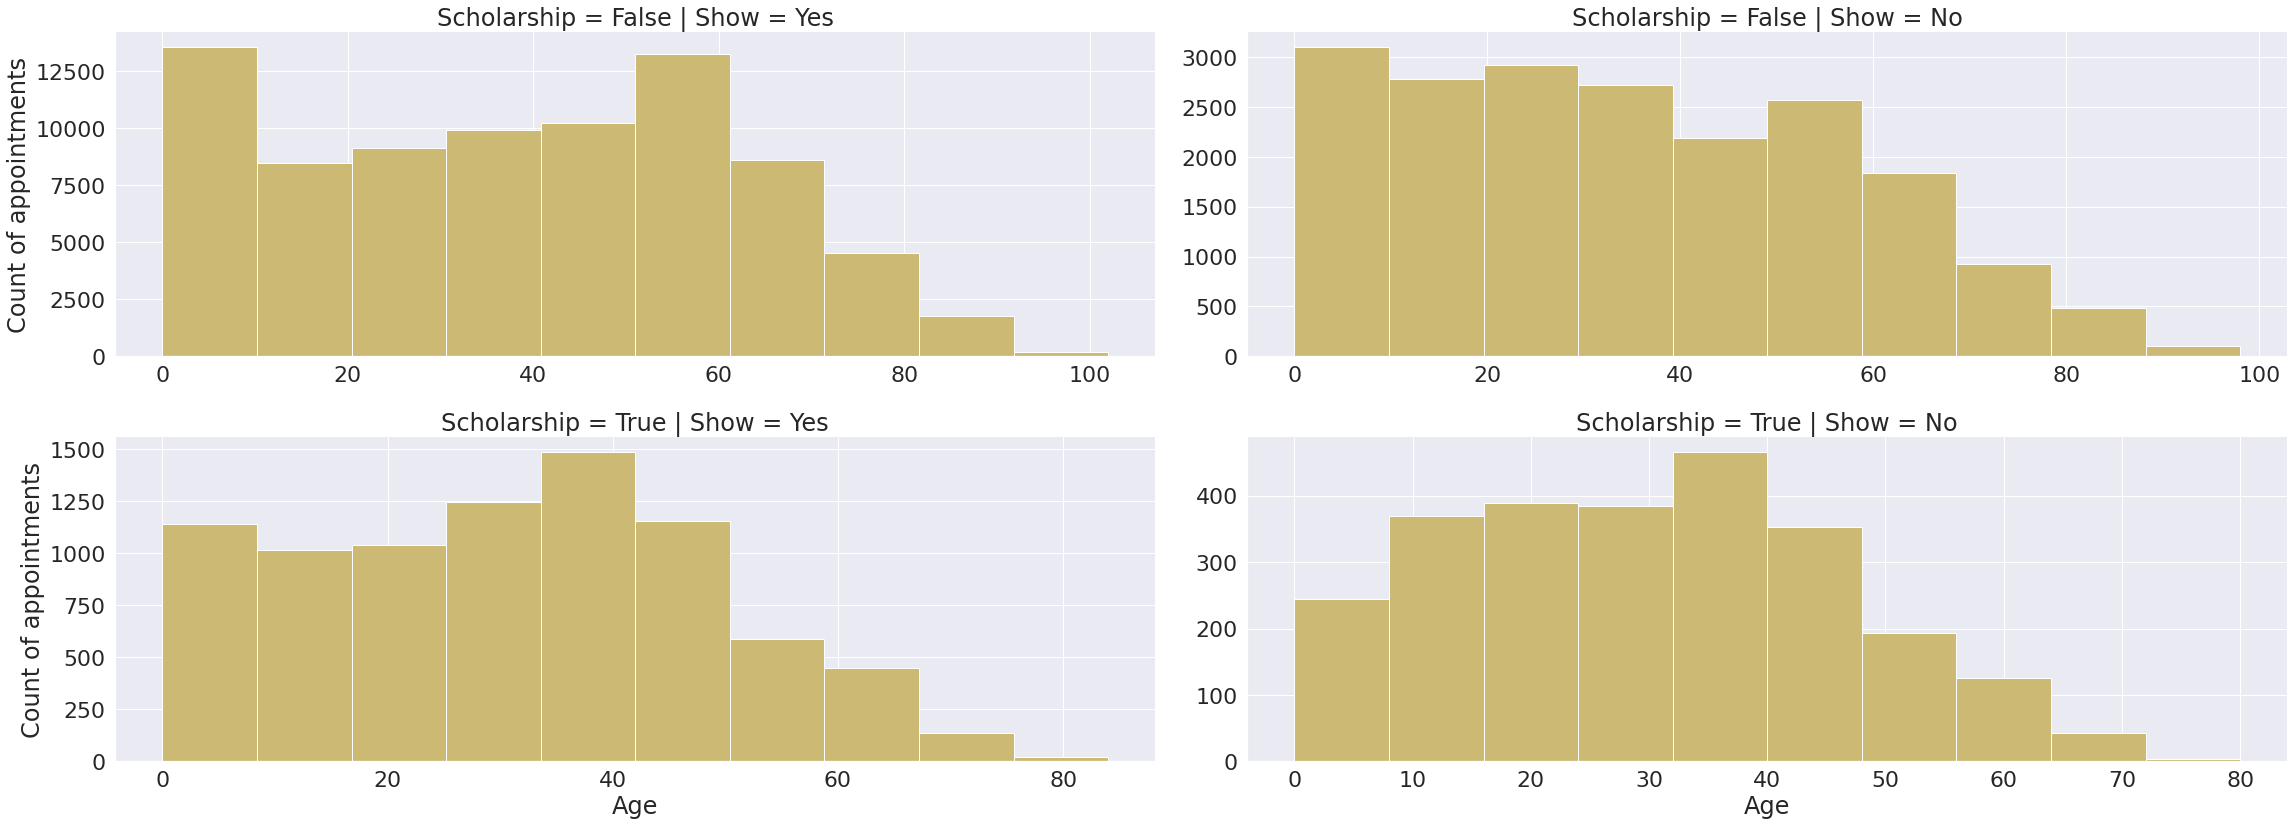

In [ ]:
# Хотел посмотреть как выплаты семейного пособия (Scholarship) влияет на посещаемость
sns.set(font_scale=2)
g = sns.FacetGrid(df, col='Show', row='Scholarship', sharex=False, sharey=False, height=6, aspect=16/6)
g = g.map(plt.hist, 'Age', color='y')
g.set_ylabels('Count of appointments')
print('Amount of appointments:')
print(f'Scholarship=True: {df[df["Scholarship"]==True]["AppointmentID"].count()}')
print(f'Scholarship=False: {df[df["Scholarship"]==False]["AppointmentID"].count()}')
# Процент посещаемости среди тех, кто получает семейное пособие
print('\nPercentage of attendance among those receiving scholarship:')
print(f'Scholarship=True & Show=Yes: {round(df[(df["Scholarship"]==True) & (df["Show"]=="Yes")]["AppointmentID"].count() / df[df["Scholarship"]==True]["AppointmentID"].count(),4)*100}%')
print(f'Scholarship=False & Show=Yes: {round(df[(df["Scholarship"]==False) & (df["Show"]=="Yes")]["AppointmentID"].count() / df[df["Scholarship"]==False]["AppointmentID"].count(),4)*100}%')
# Люди страше ~85 лет не получают пособие
# Люди, которые получают пособие чаще не приходят на приём
# Возрастная группа ~30-40 лет чаще получают пособие

### Задание 12
Возьмите набор данных customer churn, и сделайте корреляционный анализ средствами pandas.

1. Проверьте, есть ли скоррелированные признаки в наборе данных (corr() + heatmap)
2. Посчитайте корреляцию каждого признака с целевой переменной

https://drive.google.com/file/d/1GN5tTvVBO9xoafkyhY67NZ5k6KuzG3gP/view?usp=sharing

Целевая переменная у нас это отток: Да/нет


In [ ]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Корреляция с целевой переменной 
# Больше всего отток связан с общим количеством минут, использованных в течение дня (total day minutes);
# с общей стоимостью дневных звонков (total day charge)(что логично, потому что есть связь с минутами); количеством звонков в службу поддержки (customer service calls).
# Эта связь прямая (не обратная), но явно нелинейная.
df.corr()['churn']

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

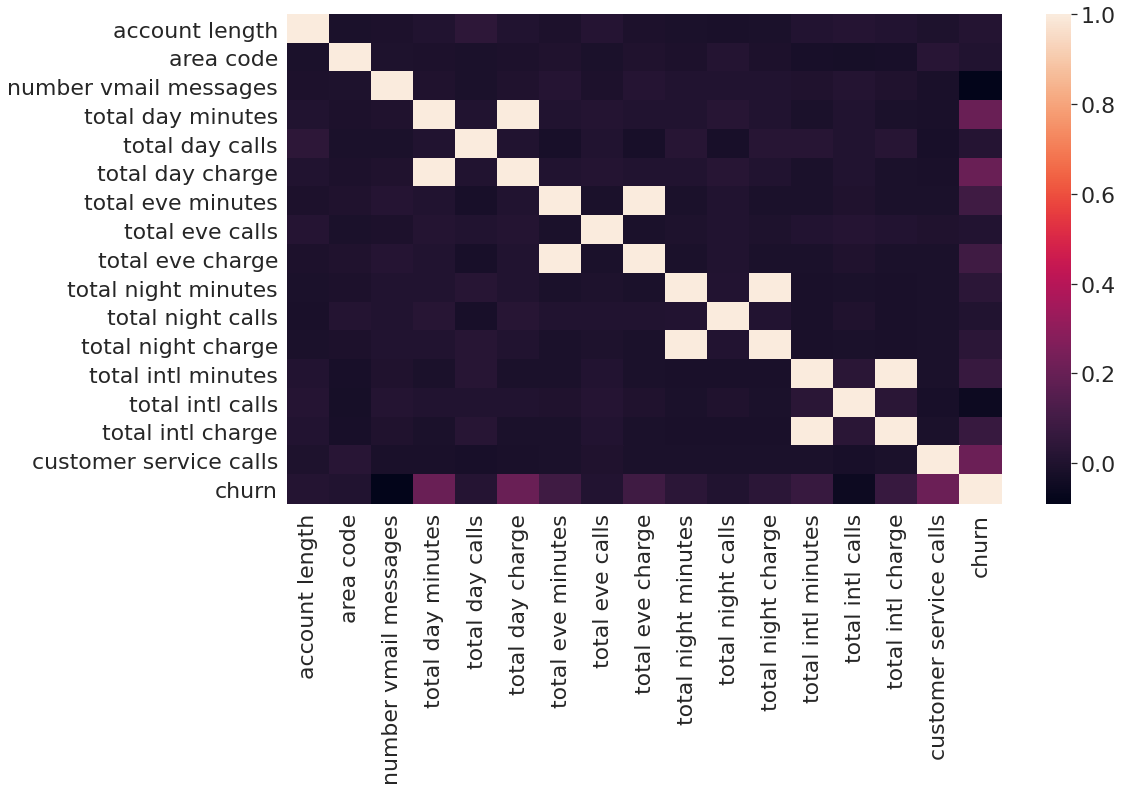

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
# Наблюдается связь между общим количеством потраченных минут и общей стоимостью звонков за тот же период, что, в принципе, понятно и без графика
# В целом, линейной зависимости между характеристиками не наблюдается

### Задание 13
Проведите когортный анализ по клиентам онлайн магазина, отобразив retention (процент клиентов в когорте в период 1-2-3- итд).


Данные для работы можно скачать [по ссылке](https://drive.google.com/file/d/1K5LLBiCZ6p_34ANiMo0rI46xMdP5ZfRT/view?usp=sharing). Это данные о продажах товаров одного интернет магазина, в данных содержится номер чека, номер товара на складе, его описание, кол-во товара в строчке чека, дата, цена за единицу, идентификатор покупателя, а также страна в которой произошла продажа.

In [ ]:
data = pd.read_csv('online retail.csv', encoding='latin1')
data = data.astype({'InvoiceDate': 'datetime64'})
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
230329,557136,21984,PACK OF 12 PINK PAISLEY TISSUES,24,2011-06-17 09:23:00,0.29,14911.0,EIRE
230330,557136,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,2011-06-17 09:23:00,12.75,14911.0,EIRE
230331,557136,22762,CUPBOARD 3 DRAWER MA CAMPAGNE,1,2011-06-17 09:23:00,14.95,14911.0,EIRE
230332,557136,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,4,2011-06-17 09:23:00,3.75,14911.0,EIRE


In [ ]:
# Поиск даты первой покупки для каждого покупателя
first_data = data[['CustomerID', 'InvoiceDate']]
first_data = first_data.drop_duplicates(subset=['InvoiceDate'])
first_data['Rank_purchase'] = first_data.groupby('CustomerID')["InvoiceDate"].rank("dense", ascending=True)
first_data = first_data[first_data['Rank_purchase'] == 1.0]
first_data = first_data.drop('Rank_purchase', axis=1)
first_data = first_data.rename({'InvoiceDate': 'First_purchase'}, axis=1)
first_data

,CustomerID,First_purchase
0,17850.0,2010-12-01 08:26:00
9,13047.0,2010-12-01 08:34:00
26,12583.0,2010-12-01 08:45:00
46,13748.0,2010-12-01 09:00:00
65,15100.0,2010-12-01 09:09:00
...,...,...
229602,17157.0,2011-06-16 15:08:00
229721,16852.0,2011-06-16 15:49:00
229999,15219.0,2011-06-16 16:57:00
230187,15014.0,2011-06-16 19:40:00


In [ ]:
# Объединение датафреймов (исходного с датами первой покупки)
data.set_index('CustomerID')
data = data.drop_duplicates(subset=['InvoiceNo'])
first_data.set_index('CustomerID')
cohort_data = pd.merge(data, first_data, on='CustomerID')
cohort_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,First_purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:26:00
2,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,2010-12-01 08:26:00
3,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
4,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
5,536377,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:34:00,1.85,17850.0,United Kingdom,2010-12-01 08:26:00
6,536396,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 10:51:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
7,536399,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 10:52:00,1.85,17850.0,United Kingdom,2010-12-01 08:26:00
8,536406,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8,2010-12-01 11:33:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
9,536407,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 11:34:00,1.85,17850.0,United Kingdom,2010-12-01 08:26:00


In [ ]:
# Выделение когортных групп по дате первой покупки и периодов заказов
cohort_data['CohortGroup']= cohort_data['First_purchase'].apply(lambda x: x.strftime('%Y-%m')) #-%d')) - можно добавить дни, но на графике получается очень много данных
cohort_data = cohort_data.drop('First_purchase', axis=1)
cohort_data['InvoiceDate']= cohort_data['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m')) #-%d'))
cohort_data = cohort_data.rename({'InvoiceDate': 'OrderPeriod'}, axis=1)
cohort_data = cohort_data.drop(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'Country'] , axis=1)
# Подсчёт кол-ва заказов для каждого периода
cohort_data = cohort_data.groupby(['CohortGroup', 'OrderPeriod']).count().rename({'CustomerID': 'orders'}, axis=1)
cohort_data

orders
CohortGroup OrderPeriod        
2010-12     2010-12        1656
            2011-01         665
            2011-02         570
            2011-03         731
            2011-04         595
            2011-05         789
            2011-06         396
2011-01     2010-12          18
            2011-01         553
            2011-02         153
            2011-03         190
            2011-04         157
            2011-05         232
            2011-06         118
2011-02     2010-12           1
            2011-01           4
            2011-02         469
            2011-03         134
            2011-04         111
            2011-05         166
            2011-06          85
2011-03     2010-12          10
            2011-02           2
            2011-03         549
            2011-04         131
            2011-05         181
            2011-06          88
2011-04     2010-12           1
            2011-01           2
            2011-04         370
            2011-05         108
            2011-06          59
2011-05     2010-12           1
            2011-01           1
            2011-03           2
            2011-04           1
            2011-05         355
            2011-06          58
2011-06     2010-12           1
            2011-01           2
            2011-02           1
            2011-03           2
            2011-04           3
            2011-05           1
            2011-06         170

In [ ]:
# Переименование периодов в 1-й, 2-й, 3-й и так далее
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohort_data.groupby(level=0).apply(cohort_period)
cohorts

orders  CohortPeriod
CohortGroup OrderPeriod                      
2010-12     2010-12        1656             1
            2011-01         665             2
            2011-02         570             3
            2011-03         731             4
            2011-04         595             5
            2011-05         789             6
            2011-06         396             7
2011-01     2010-12          18             1
            2011-01         553             2
            2011-02         153             3
            2011-03         190             4
            2011-04         157             5
            2011-05         232             6
            2011-06         118             7
2011-02     2010-12           1             1
            2011-01           4             2
            2011-02         469             3
            2011-03         134             4
            2011-04         111             5
            2011-05         166             6
            2011-06          85             7
2011-03     2010-12          10             1
            2011-02           2             2
            2011-03         549             3
            2011-04         131             4
            2011-05         181             5
            2011-06          88             6
2011-04     2010-12           1             1
            2011-01           2             2
            2011-04         370             3
            2011-05         108             4
            2011-06          59             5
2011-05     2010-12           1             1
            2011-01           1             2
            2011-03           2             3
            2011-04           1             4
            2011-05         355             5
            2011-06          58             6
2011-06     2010-12           1             1
            2011-01           2             2
            2011-02           1             3
            2011-03           2             4
            2011-04           3             5
            2011-05           1             6
            2011-06         170             7

In [ ]:
results = cohorts.reset_index().set_index(['CohortGroup', 'CohortPeriod']).drop('OrderPeriod', axis=1)
results

orders
CohortGroup CohortPeriod        
2010-12     1               1656
            2                665
            3                570
            4                731
            5                595
            6                789
            7                396
2011-01     1                 18
            2                553
            3                153
            4                190
            5                157
            6                232
            7                118
2011-02     1                  1
            2                  4
            3                469
            4                134
            5                111
            6                166
            7                 85
2011-03     1                 10
            2                  2
            3                549
            4                131
            5                181
            6                 88
2011-04     1                  1
            2                  2
            3                370
            4                108
            5                 59
2011-05     1                  1
            2                  1
            3                  2
            4                  1
            5                355
            6                 58
2011-06     1                  1
            2                  2
            3                  1
            4                  2
            5                  3
            6                  1
            7                170

In [ ]:
results = results.unstack(level=1)
results

orders                                          
CohortPeriod       1      2      3      4      5      6      7
CohortGroup                                                   
2010-12       1656.0  665.0  570.0  731.0  595.0  789.0  396.0
2011-01         18.0  553.0  153.0  190.0  157.0  232.0  118.0
2011-02          1.0    4.0  469.0  134.0  111.0  166.0   85.0
2011-03         10.0    2.0  549.0  131.0  181.0   88.0    NaN
2011-04          1.0    2.0  370.0  108.0   59.0    NaN    NaN
2011-05          1.0    1.0    2.0    1.0  355.0   58.0    NaN
2011-06          1.0    2.0    1.0    2.0    3.0    1.0  170.0

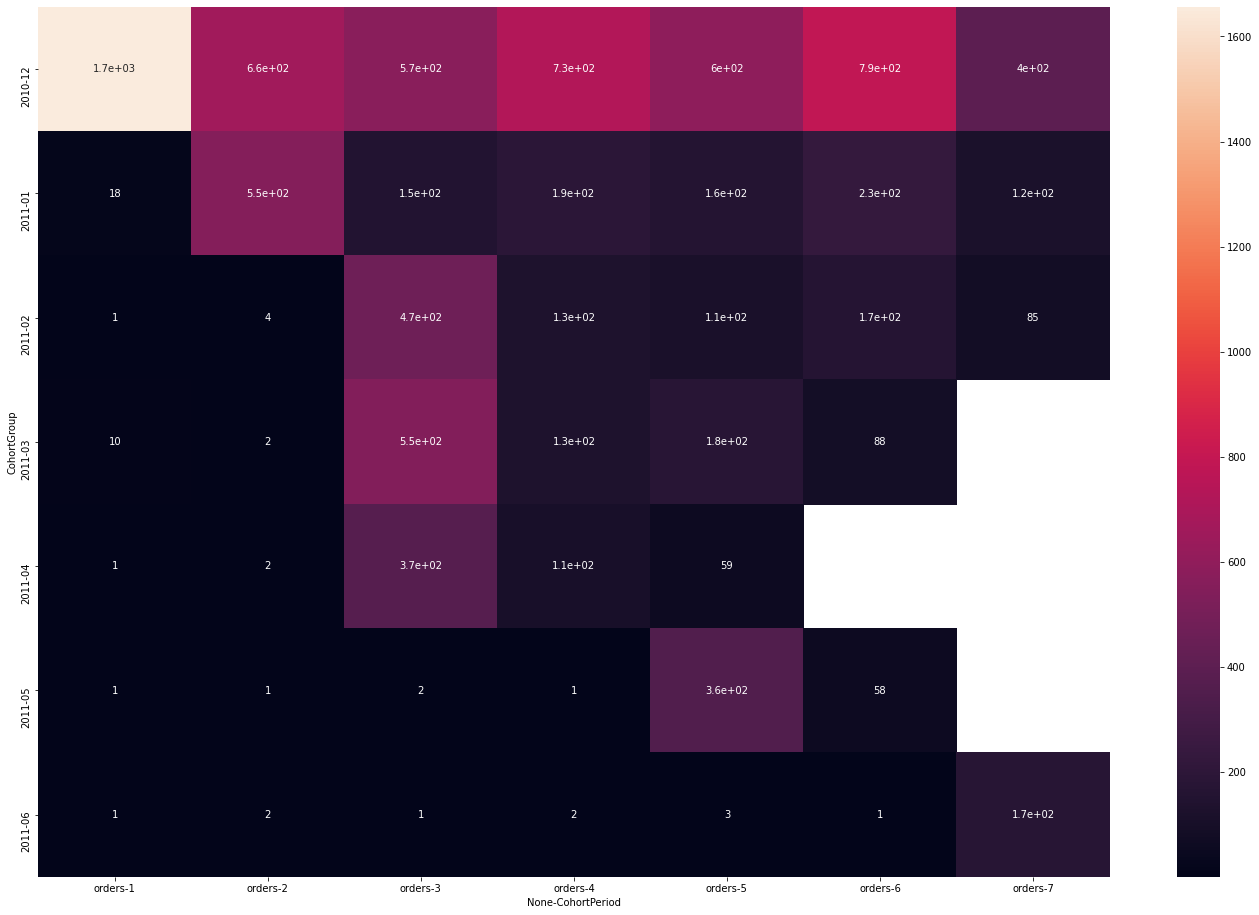

In [ ]:
plt.figure(figsize=(24, 16))
sns.heatmap(results, mask=results.isnull(), annot=True)

In [ ]:
# Периодическая динамика по кол-ву заказов
results_relative = results.divide(results.T.max(), axis=0)
results_relative

orders                      ...                              
CohortPeriod         1         2         3  ...         5         6         7
CohortGroup                                 ...                              
2010-12       1.000000  0.401570  0.344203  ...  0.359300  0.476449  0.239130
2011-01       0.032550  1.000000  0.276673  ...  0.283906  0.419530  0.213382
2011-02       0.002132  0.008529  1.000000  ...  0.236674  0.353945  0.181237
2011-03       0.018215  0.003643  1.000000  ...  0.329690  0.160291       NaN
2011-04       0.002703  0.005405  1.000000  ...  0.159459       NaN       NaN
2011-05       0.002817  0.002817  0.005634  ...  1.000000  0.163380       NaN
2011-06       0.005882  0.011765  0.005882  ...  0.017647  0.005882  1.000000

[7 rows x 7 columns]

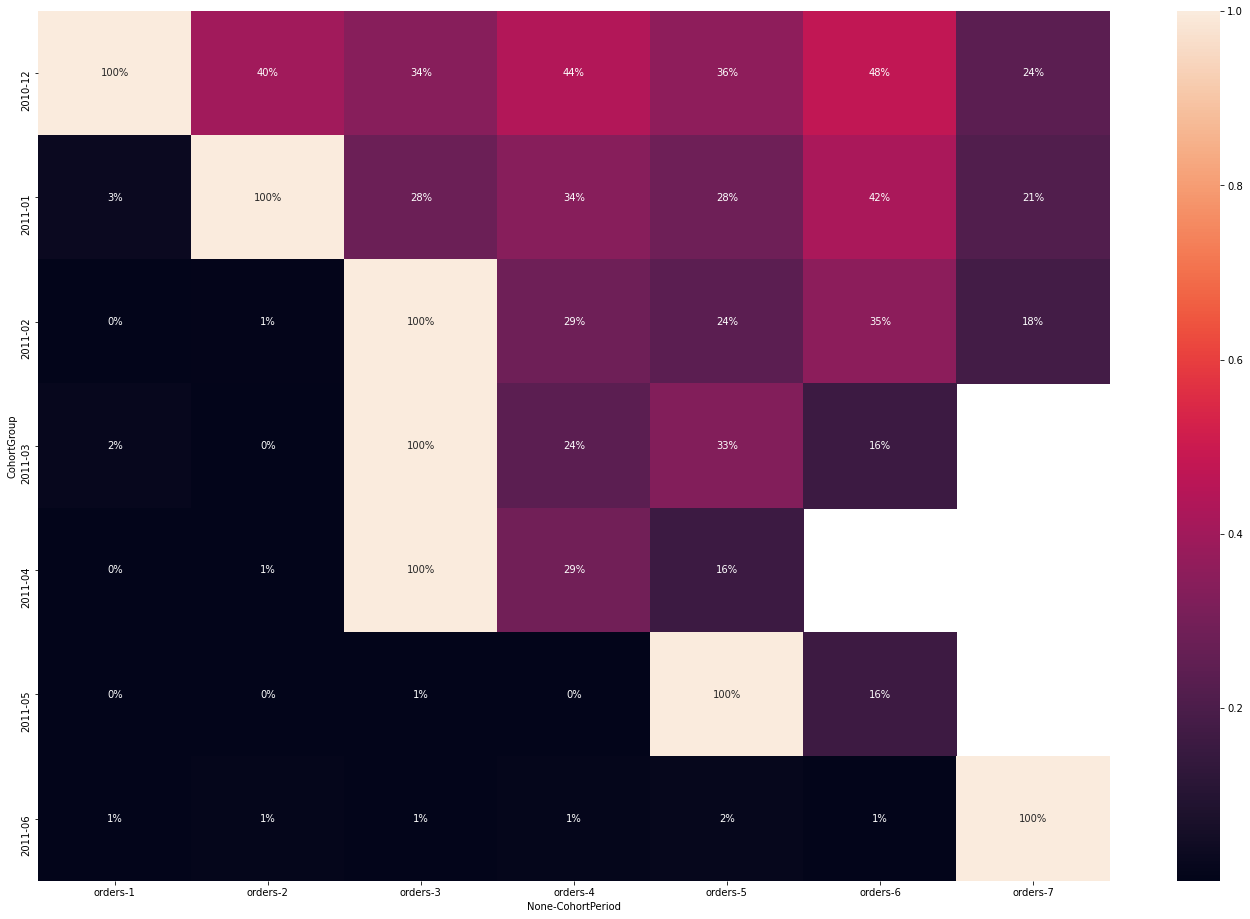

In [ ]:
plt.figure(figsize=(24, 16))
sns.heatmap(results_relative, mask=results_relative.isnull(), annot=True, fmt='.0%')